In [1]:
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from data_utils import *

In [6]:
time_series_dir = '/Users/linggeli/cnn_graph/data/time_series/cup/'
behavioral_dir = '/Users/linggeli/cnn_graph/data/fMRIbehav/cup/'

In [7]:
subject_id_list = get_subject_id(time_series_dir)

In [8]:
print(subject_id_list)

[3748, 2330, 2132, 2085, 2091, 3416, 2046, 2250, 2292, 3198, 2286, 2047, 2090, 2084, 2127, 2133, 3777, 2119, 2131, 2086, 2079, 2290, 2253, 2247, 2050, 2078, 3399, 2124, 2118, 2336, 2120, 2134, 2108, 2295, 3821, 2256, 2243, 2294, 3411, 3377, 2096, 2109, 2121, 3029, 2323, 2309, 3003, 2137, 2123, 2080, 3822, 2296, 2241, 2255, 3638, 3360, 2081, 2122, 2136, 2334, 2192, 2025, 2185, 2191, 2152, 3476, 2032, 2026, 3648, 2231, 3107, 2027, 2033, 2153, 2190, 3932, 2180, 2194, 2143, 2157, 2023, 2235, 2221, 2209, 3103, 3102, 3116, 2234, 2022, 2036, 2156, 2142, 3062, 3060, 2197, 2154, 2140, 2020, 2237, 2223, 2021, 2169, 2141, 2196, 3075, 3087, 2170, 2164, 2038, 2004, 3130, 2206, 2212, 2213, 3643, 2005, 2165, 2171, 3051, 2173, 2239, 2210, 2006, 3481, 2166, 3720, 3283, 2189, 2162, 2176, 2016, 2002, 3137, 2003, 2017, 2177, 2188, 3043, 3096, 2149, 2001, 2203, 2216, 2028, 2148, 2160, 3040, 2113, 2098, 2067, 3190, 2259, 3191, 3344, 2106, 3218, 2304, 2310, 2338, 2104, 2110, 2058, 2070, 2064, 2299, 3811, 227

In [9]:
time_series_data = load_time_series(time_series_dir, 2277)

In [10]:
print(time_series_data.shape)

(375, 290)


In [11]:
time_series_data = preprocess_time_series(time_series_data)

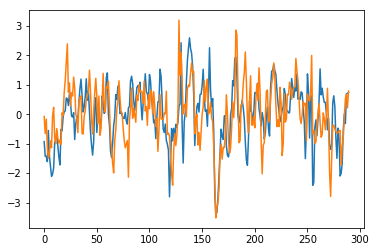

In [12]:
plt.plot(time_series_data[0, :])
plt.plot(time_series_data[1, :])
plt.show()

In [13]:
from sklearn.linear_model import LinearRegression

In [40]:
y = time_series_data[10, 20:]
print(y.shape)
x = (np.arange(y.shape[0]) + 1).reshape(-1, 1)

(270,)


In [45]:
lm = LinearRegression()

In [46]:
lm = lm.fit(x, y)

In [47]:
y_hat = lm.predict(x)
res = y - y_hat

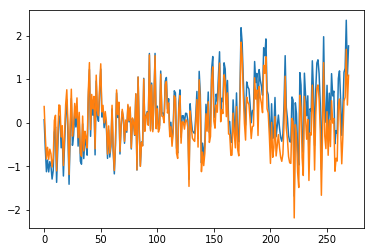

In [48]:
plt.plot(y)
plt.plot(res)

In [50]:
BURN_IN = 20

In [51]:
def preprocess_time_series(time_series_data):
    """
    Center and scale time series per channel then remove linear trend after burn-in.

    :param time_series_data: (2d numpy array) time series data of format [channel, time]
    :return: preprocessed time series
    """
    time_series_data = scale(time_series_data, axis=1)
    ts_no_trend = np.zeros(time_series_data.shape)
    lm = LinearRegression()
    for i in range(time_series_data.shape[0]):
        y = time_series_data[i, BURN_IN:]
        x = (np.arange(y.shape[0]) + 1).reshape(-1, 1)
        lm = lm.fit(x, y)
        y_hat = lm.predict(x)
        res = y - y_hat
        ts_no_trend[i, BURN_IN:] = res
    return ts_no_trend

In [52]:
test = preprocess_time_series(time_series_data)

In [53]:
test.shape

(375, 290)

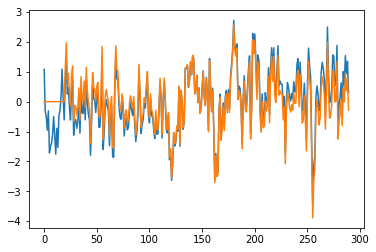

In [55]:
plt.plot(time_series_data[100, :])
plt.plot(test[100, :])

In [11]:
behavioral_data = load_behavioral(behavioral_dir, 2277)

In [12]:
print(behavioral_data.shape)

(140, 13)


In [13]:
print(behavioral_data[:, 1]) # 1 win 2 loss
print(behavioral_data[:, 12]) # block from 1 to 4

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]


In [15]:
print(behavioral_data[:, 11]) # actual time points

[  4.01400767   8.01389007  13.01356294  16.01347955  21.01322768
  24.01304252  28.01290825  31.01273763  34.01265851  37.01245454
  40.01232454  43.01217359  48.01195294  56.01155311  61.01133972
  65.01113062  72.01082743  75.01068974  79.01049859  82.01034379
  86.01018001  90.00996705  93.00984048  97.00965574 100.00950821
 104.00931236 107.00918878 111.00898737 116.00872823 119.00861576
 125.0083036  128.00816804 133.00793498 137.00775581 140.00761085
 147.00728842 151.00712378 156.00687918 159.00673892 164.00649218
 167.00636774 171.00617788 174.00601709 177.00588752 180.00572802
 183.00560144 186.00547743 191.00523882 199.00483086 204.00460251
 208.00443275 215.00408081 218.00397262 222.00374042 225.00364293
 229.00345306 233.01993496 236.01979042 240.01958217 243.01955993
 247.01926701 250.01916053 254.01891636 259.01871666 262.01858538
 268.01828177 271.01814364 276.01795934 280.01773355 283.01760398
 290.01723965 294.01708613 299.01687403 302.01671624 307.01647463
 310.01633

In [16]:
block_indices(behavioral_data, 1)

(2, 70)

In [18]:
time_series_blocks = divide_time_series(time_series_data, behavioral_data)

In [19]:
print(time_series_blocks[0].shape)

(375, 50)


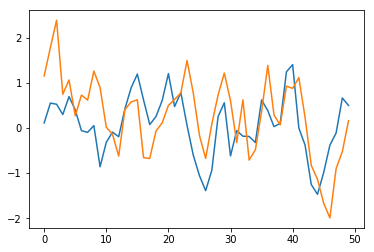

In [20]:
plt.plot(time_series_blocks[0][0, :])
plt.plot(time_series_blocks[0][1, :])
plt.show()

In [24]:
fourier_coef = summarize_time_series(time_series_blocks[0])

In [25]:
print(fourier_coef.shape)

(375, 2)


In [28]:
features = create_features(time_series_data, behavioral_data)

In [29]:
features.shape

(4, 375, 2)